## 2. Primeres Mètriques i Evaluació de Models

En aquesta pràctica entendrem i observarem la importancia que té evaluar i seleccionar mètodes de evaluacions acurats per a definir si el nostre model està funcionant tal i com esperem.

Les mètriques d'avaluació són específiques del tipus de tasca d'aprenentatge automàtic que realitza un model.

Per exemple, per a la tasca de classificació, el model s'avalua mesurant el grau de coincidència d'una categoria predita amb la categoria real. I, per a l'agrupació en clústers, l'avaluació es basa en el pròxims que estan els uns dels altres els elements agrupats i en el grau de separació existent entre els clústers.

En aquesta pràctica treballarem sobre un cas molt senzill utilitzant un Knn que ja haureu vist en diferents assigantures durant els cursos.

Per que no ho sàpiga el K Neighbor(KNN) és un algorisme d'aprenentatge automàtic molt simple, fàcil d'entendre, versàtil i un dels algorismes d'aprenentatge automàtic més utilitzats. L'algorisme KNN s'ha utilitzat tant per a problemes de classificació com de regressió i es basa en l'enfocament de similitud de **¿característiques?**.


#### Primerament definirem el model sobre un dataset ja definit en la propia llibreria del sklearn

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

In [39]:
# import iris dataset
iris = datasets.load_iris()
# np.c_ is the numpy concatenate function
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])

In [40]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Fem split entre X i Y

In [41]:
X= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

In [42]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
display(y.head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [44]:
## DEfinim el train i el test per al model
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)


In [45]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')


training set size: 120 samples 
test set size: 30 samples


Text(0.5, 1.08, 'Pair Plot of the dataset Before normalization')

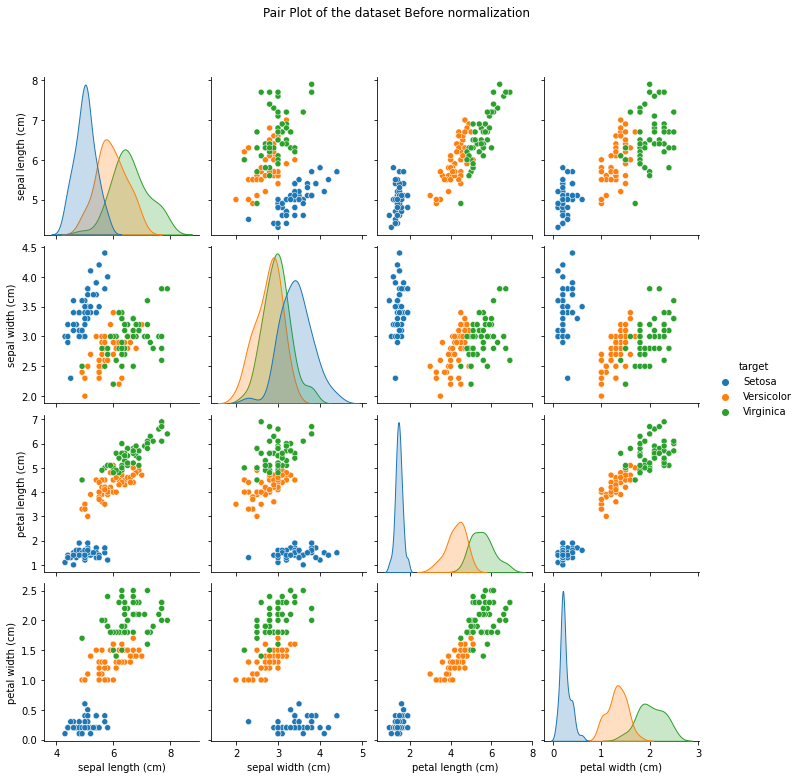

In [46]:
## Before
# View the relationships between variables; color code by species type
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)


In [47]:
def Normalize(x_train) -> object:
    scale = Normalizer().fit(x_train) # the scaler is fitted to the training set
    return scale

def Knn_train_and_predict(x_train,y_train, x_test,K=3) -> list:

    knn=KNeighborsClassifier(K)
    knn.fit(x_train, y_train)
    print("Trained")
    y_pred_sklearn= knn.predict(x_test)
    return y_pred_sklearn, knn





In [48]:
scaler = Normalize(x_train)
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [49]:
print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

x train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

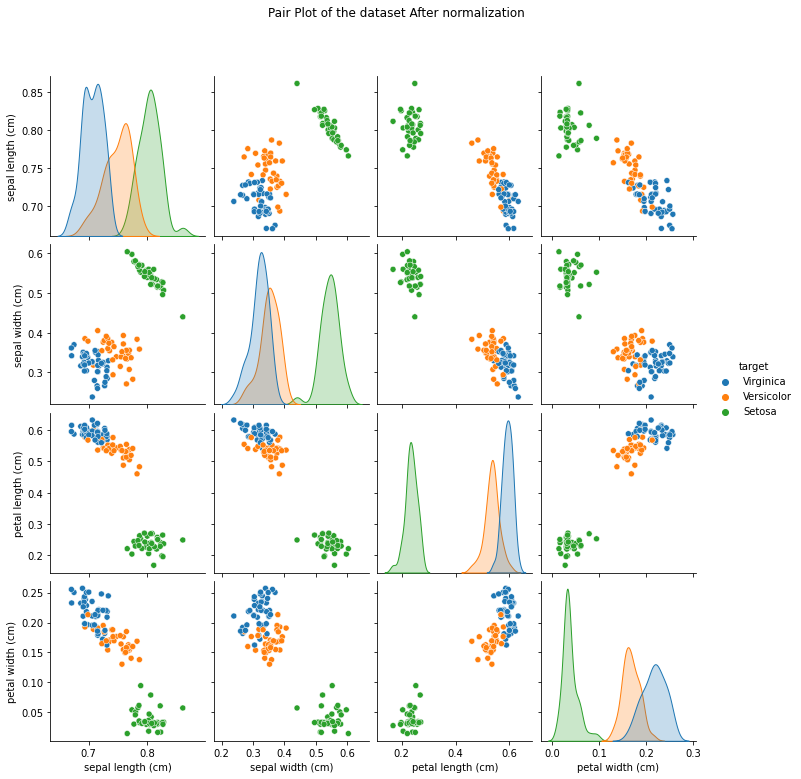

In [50]:

## After
iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train],
                        columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

In [54]:
## Entrenem

y_pred, knn = Knn_train_and_predict(normalized_x_train, y_train, normalized_x_test)
print(y_pred)


Trained
[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [55]:
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred)}')

The accuracy of sklearn implementation is 0.9666666666666667


# Primeres mètriques

**En aquest exemple anem a provar amb un dataset binary anomenat Pima, conté informació sobre testos de diabetes**

In [56]:
from pandas import read_csv
# load the dataset
dataframe = read_csv("pima-indians-diabetes.csv", header=0, names=["Pregnancies", "Glucose", "Blood Preassure",
                                                                  "SkinThickness","Insulin", "BMI", "DiabetesPedigreeFunction"
                                                                  ,"Age", "class"
                                                                  ])
# get the values
values = dataframe.values
X, y = values[:, :-1], values[:, -1]
# gather details
n_rows = X.shape[0]
n_cols = X.shape[1]
classes = np.unique(y)
n_classes = len(classes)
# summarize
print('N Examples: %d' % n_rows)
print('N Inputs: %d' % n_cols)
print('N Classes: %d' % n_classes)
print('Classes: %s' % classes)
print('Class Breakdown:')
# class breakdown
breakdown = ''
for c in classes:
    total = len(y[y == c])
    ratio = (total / float(len(y))) * 100
    print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

N Examples: 767
N Inputs: 8
N Classes: 2
Classes: [0. 1.]
Class Breakdown:
 - Class 0.0: 500 (65.18905%)
 - Class 1.0: 267 (34.81095%)


In [57]:
dataframe.head()

,Pregnancies,Glucose,Blood Preassure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [58]:
## DEfinim el train i el test per al model
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train_binary= np.asarray(x_train)
y_train_binary= np.asarray(y_train)

x_test_binary= np.asarray(x_test)
y_test_binary= np.asarray(y_test)


In [59]:
scaler = Normalize(x_train_binary)
normalized_x_train_pima= scaler.transform(x_train_binary) # the scaler is applied to the training set
normalized_x_test_pima= scaler.transform(x_test_binary) # the scaler is applied to the test set

In [60]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 613 samples 
test set size: 154 samples


Text(0.5, 1.08, 'Pair Plot of the Pima Dataset')

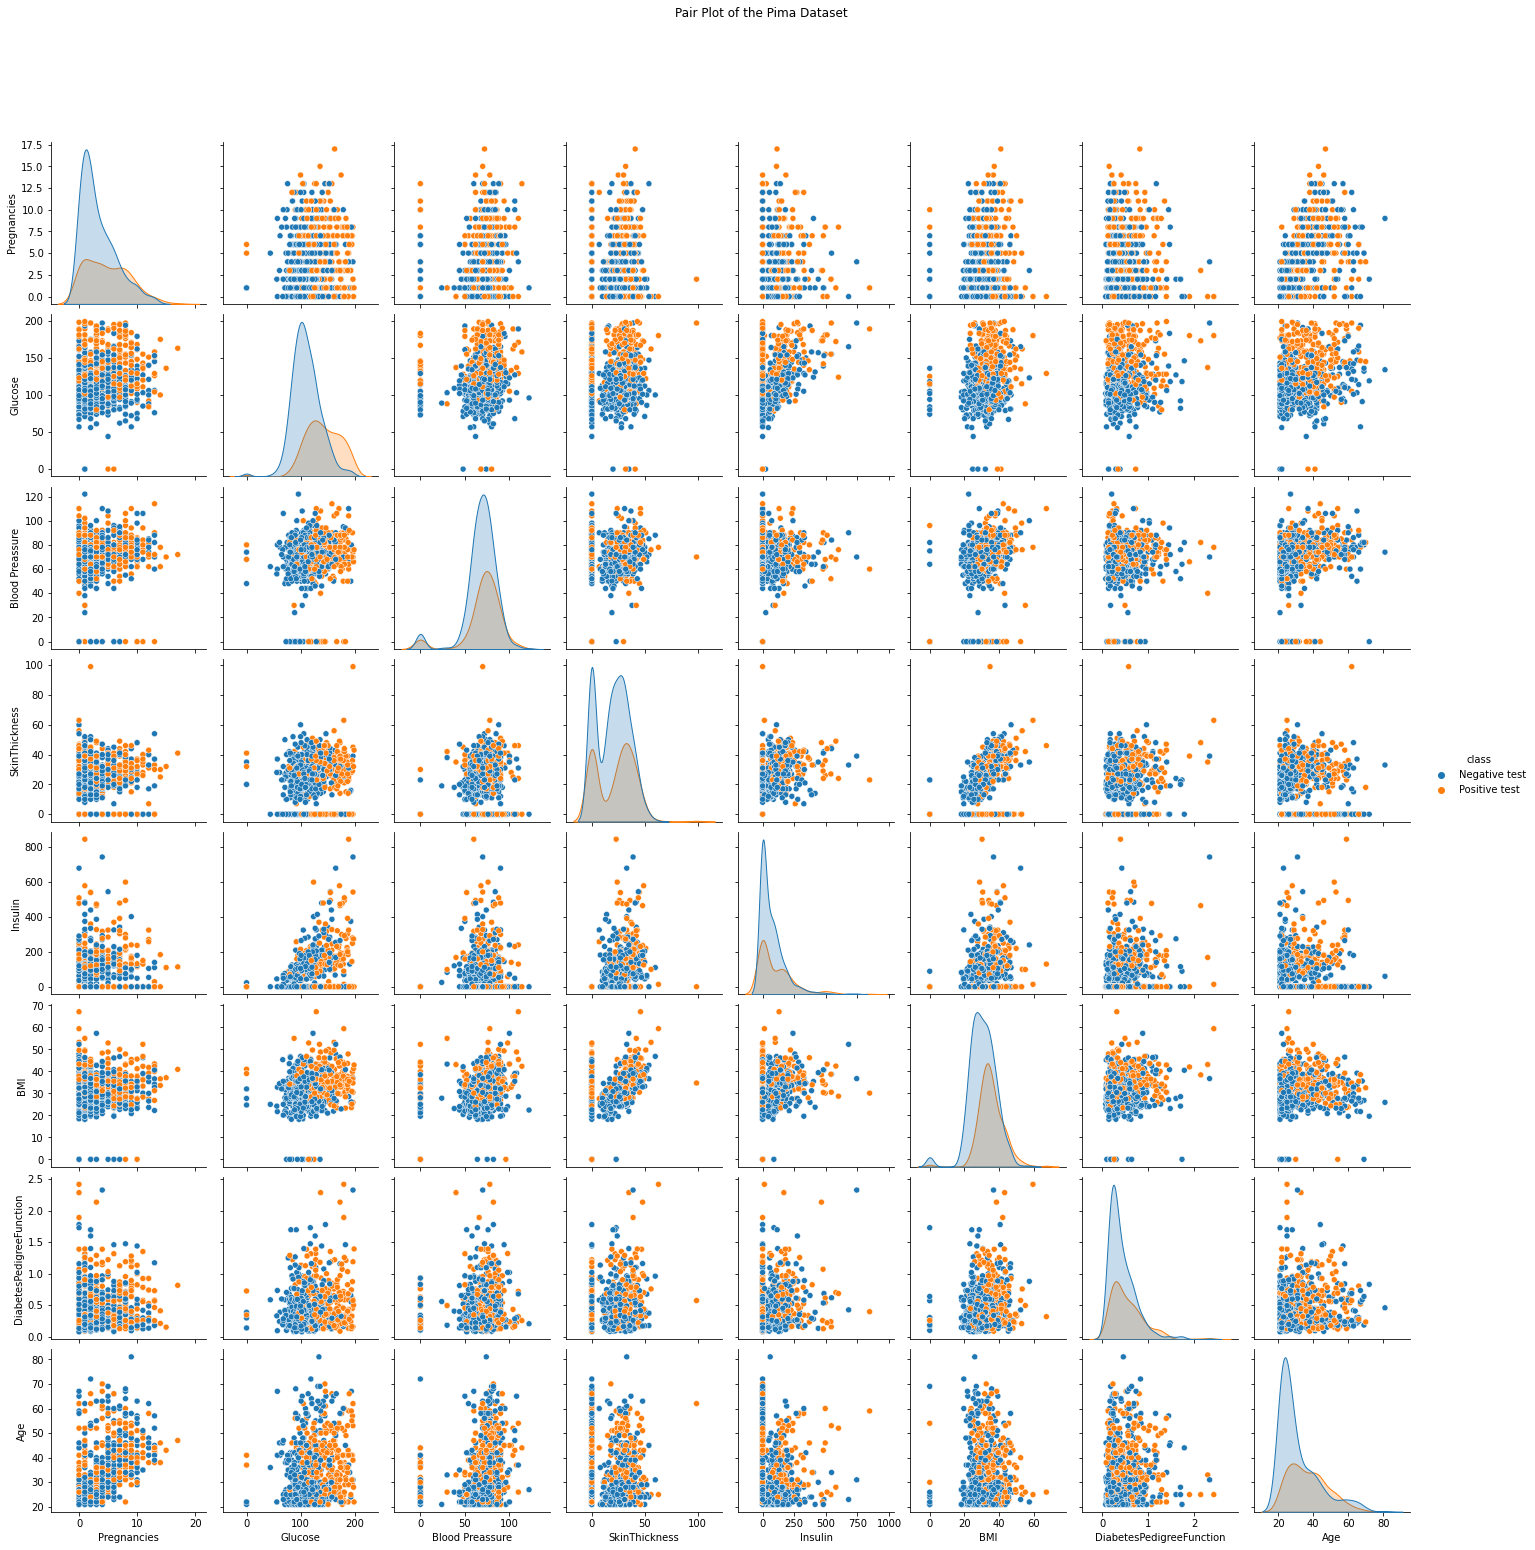

In [61]:
## Before
# View the relationships between variables; color code by species type
di= {0.0: 'Negative test', 1.0: 'Positive test'} # dictionary

before= sns.pairplot(dataframe.replace({'class': di}), hue= 'class')
before.fig.suptitle('Pair Plot of the Pima Dataset', y=1.08)

### Veiem per que normalitzar en aquest cas no te sentit

Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

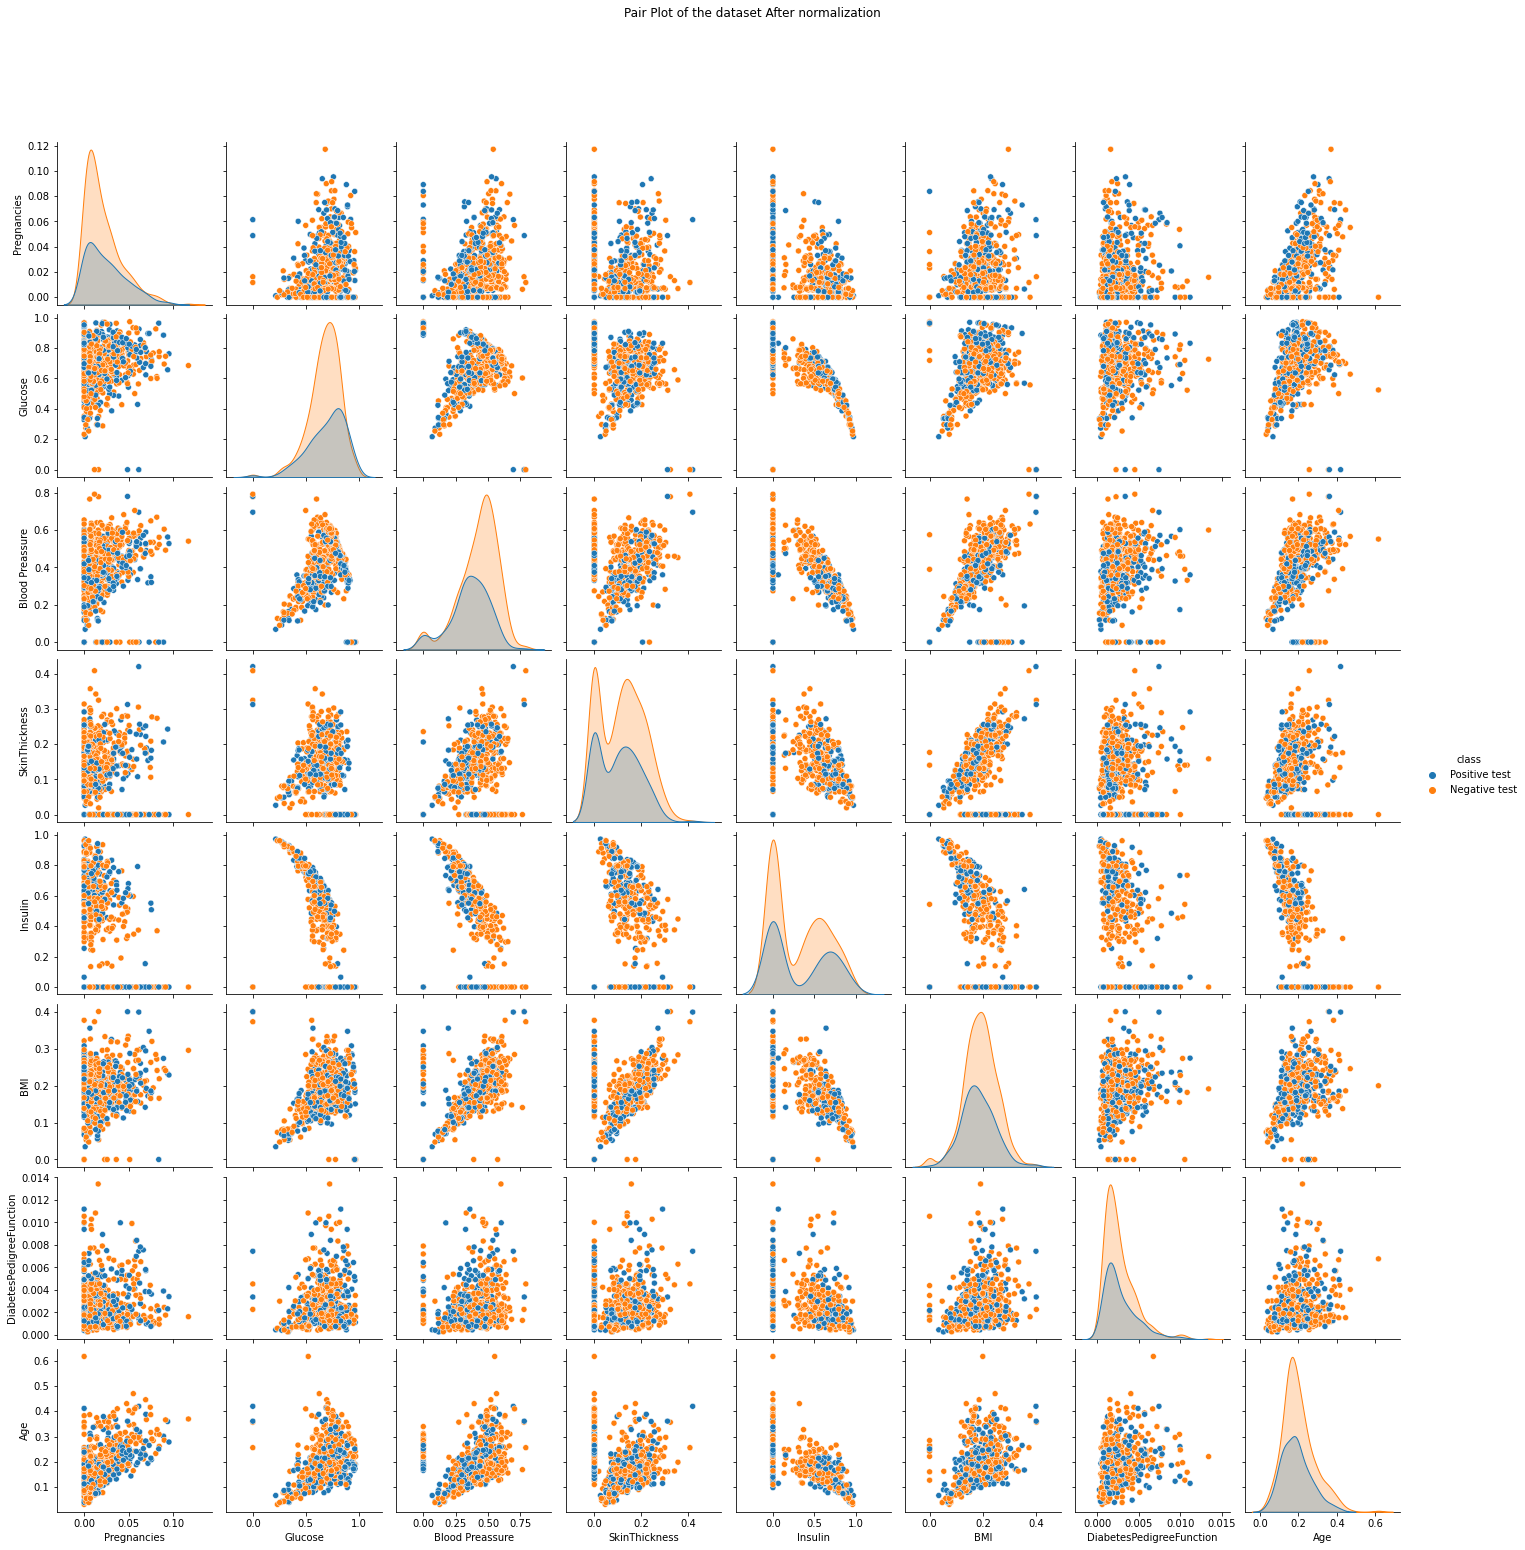

In [62]:
pima_df_2= pd.DataFrame(data= np.c_[normalized_x_train_pima, y_train_binary],
                        columns= dataframe.columns)

di= {0.0: 'Negative test', 1.0: 'Positive test'} # dictionary
after= sns.pairplot(pima_df_2.replace({'class':di}), hue= 'class')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

In [63]:
y_pred_pima, knn_pima = Knn_train_and_predict(x_train_binary, y_train_binary, x_test_binary, K=10)
print(y_pred_pima)

Trained
[1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [64]:
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test_binary, y_pred_pima)}')

The accuracy of sklearn implementation is 0.7662337662337663


##### Un 76% pot sonar a que no és del tot dolent i que el model amb lo senzill que és sembla que pot aprendre però en que s'ha equivocat?

<img src="images/CF.jpeg" width="500">

La matriu de confusió és una mesura molt popular utilitzada per resoldre problemes de classificació. Es pot aplicar a la classificació binària, així com als problemes de classificació multiclasse.
Una de les mètriques més utilitzades en la classificació és el accuracy. 
El accuracy pot ser enganyosa si s'utilitza amb conjunts de dades desequilibrats, i per tant hi ha altres mètriques basades en la matriu de confusió que poden ser útils per avaluar el rendiment.


En aquest cas una de les mètriques més importants en temes de classificació binary és la del **F-score** que et parla de la relació entre la **precissió** i el **recall**, dues mètriques molt importants.

<img src="images/Precision_recall.png" width="500">


**La mètrica del F-score com s'ha comentat et parla de la relació entre les altres dues mètriques, per tant en tasques de classificació equilibrades (on una de les mètriques no sigui més important que l'altra) és important utilitzar aquesta mètrica.**


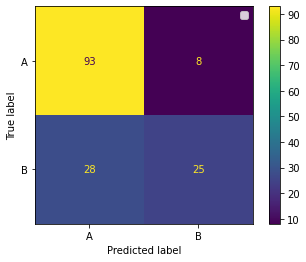

In [137]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_binary, y_pred_pima)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["A","B"])
disp.plot(xticks_rotation="horizontal")
plt.legend(["A: No Diabètic", "B: Diabètic"])
plt.show()


In [136]:
print("El recompte són 28 falsos positius, això vol dir 28 falsos A (falsos no diabètics) i 8 falsos negatius")

El recompte són 28 falsos positius i 8 falsos negatius


In [67]:
print(precision_score(y_test_binary, y_pred_pima))

0.7575757575757576


In [68]:
print(recall_score(y_test_binary, y_pred_pima))

0.4716981132075472


**En aquest cas tenim un problema serio per que li estas dient a molta gent que no té diabetes quan en vere si que en te...**

De totes maneres hi ha més maneres d'evaluar com és la performance d'un model que es relacionen amb la precissió i el recall.
En aquest cas dos gràfiques que ajuden a medir com de bo és el model són la **ROC curve i la PR curve**.

<img src="images/Roc_curve.svg.png" width="300">


La corba ROC (receiver operating characteristic) relaciona el recall amb el ràtio de falsos positius. És a dir relaciona la sensibilitat del nostre model amb les fallades optimistes (classificar els negatius com a positius). Té sentit ja que, generalment, si augmentem el recall, el nostre model tendirà a ser més optimista i introduirà mes falsos positius en la classificació.

En les corbes ROC, ens interessa que la corba s'acosti el màxim possible a la cantonada superior esquerra de la gràfica, de manera que el fet d'augmentar la sensibilitat (el recall) no faci que el nostre model introdueixi més falsos positius.


<img src="images/PR_curve.png" width="300">



La corba PR és el resultat de dibuixar la gràfica entre el precision i el recall. Aquesta gràfica ens permet veure a partir de què recall tenim una degradació de la precisió i viceversa. L'ideal seria una corba que s'acosti el màxim possible a la cantonada superior dreta (alta precisió i alt recall).

La manera d'evaluar un PR normalment s'anomena MAP (mean average precission) i és una manera de calcular l'àrea sota la corba PR o PR AUC, o cosa que és el mateix, el resultat d'integrar la corba. El Average Precision ens serveix per a avaluar i comparar el rendiment de models. Com més s'acosti el seu valor a 1, millor serà el nostre model.

Aquesta corva sembla una mica més complica per tant aquí hi ha una explicació molt visual

https://sanchom.wordpress.com/tag/average-precision/

In [31]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_curve, RocCurveDisplay, auc

In [116]:
y_pred_prob = knn_pima.predict_proba(x_test_binary)
print(y_pred_prob[:10])

[[0.3 0.7]
 [0.7 0.3]
 [0.3 0.7]
 [0.8 0.2]
 [0.9 0.1]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]]


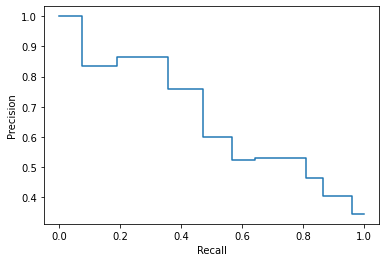

In [117]:
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_prob[:,1])
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

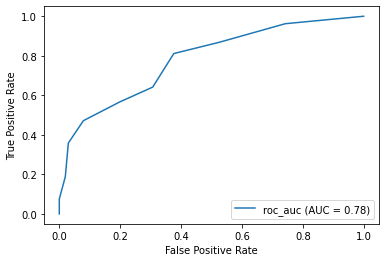

In [119]:
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='roc_auc')
display.plot()

plt.show()

### Hi ha maneres de calcular el millor threshold un exemple és la G-mean i la J-statistic

<img src="images/Thres.png" width="1000">


In [131]:
def J_statistic(y_true:list, y_score:list):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    
        # plot the roc curve for the model
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Logistic')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    # show the plot
    plt.show()
    return best_thresh
    

def G_mean(y_true:list, y_score:list):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    # plot the roc curve for the model
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Logistic')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    # show the plot
    plt.show()
    return thresholds[ix]

Best Threshold=0.300000, G-Mean=0.711


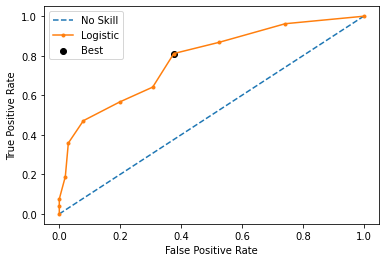

0.3

In [132]:
G_mean(y_test_binary, y_pred_prob[:,1])

### Anem a implementar un K-Fold !! 


La validació creuada o cross-validation és una tècnica utilitzada per a avaluar els resultats d'una anàlisi estadística i garantir que són independents de la partició entre dades d'entrenament i prova. Consisteix a repetir i calcular la mitjana aritmètica obtinguda de les mesures d'avaluació sobre diferents particions.

El mètode K-Fold Cross-Validation és també un procés iteratiu. Consisteix a dividir les dades de manera aleatòria en k grups d'aproximadament la mateixa grandària, k-1 grups s'empren per a entrenar el model i un dels grups s'empra com a validació. Aquest procés es repeteix k vegades utilitzant un grup diferent com a validació en cada iteració. El procés genera k estimacions de l'error la mitjana del qual s'empra com a estimació final.

Dos avantatges del mètode K-Fold Cross-Validation enfront del LOOCV:

Requeriments computacionals: el nombre d'iteracions necessàries ve determinat pel valor k triat. En general, es recomana un k entre 5 i 10.

Balanç entre bias i variància: el principal avantatge de K-fold CV és que aconsegueix una estimació precisa de l'error de test gràcies a un millor balanç entre bias i variància. LOOCV empra n-1 observacions per a entrenar el model, la qual cosa és pràcticament tot el set de dades disponible, maximitzant així l'ajust del model a les dades disponibles i reduint el bias. No obstant això, per a l'estimació final de l'error es fan una mitjana de les estimacions de n models entrenats amb pràcticament les mateixes dades (només hi ha una dada de diferència entre cada conjunt d'entrenament), per la qual cosa estan altament correlacionats. Això es tradueix en un major risc de overfitting i per tant de variància. En el mètode K-fold CV els k grups emprats com a entrenament són molt menys solapants, la qual cosa es tradueix en menor variància en fer una mitjana de les estimacions d'error.



<img src="images/Cross.png" width="1000">

In [107]:
def Customed_Kfold(X, y, n_splits):
    kf = KFold(n_splits=n_splits)
    k_values = np.arange(1,30,2)
    acc_k = []
    
    for k in k_values:
        accuracy_by_fold = 0
        knn = KNeighborsClassifier(k)
        
        for x_train_fold_idx, x_valid_fold_idx in kf.split(X):
            
            ## The train partition i (n_splits-1)
            x_train_fold = X[x_train_fold_idx]
            y_train_fold = y[x_train_fold_idx]
            
            ## The test partition (else)
            x_test_fold = X[x_valid_fold_idx]
            y_test_fold = y[x_valid_fold_idx]
            
            ## Fit the model
            knn.fit(x_train_fold, y_train_fold)
            y_pred_fold = knn.predict(x_test_fold)
            
            accuracy_by_fold += accuracy_score(y_pred_fold, y_test_fold) ## Accumulates the accuracyç
        
        accuracy_fold= accuracy_by_fold/ n_splits ## Divide by the number of splits
        acc_k.append(accuracy_fold)
    
    return acc_k, k_values
            

In [108]:
accuracies, ks = Customed_Kfold(X, y, 10) # Pima

In [110]:
print(f'The accuracy for each K value was {list ( zip (accuracies, ks))}')
print(f'Best accuracy was {np.max(accuracies)}, which corresponds to a value of K= {ks[np.argmax(accuracies)]}')

The accuracy for each K value was [(0.6780075187969924, 1), (0.7026828434723171, 3), (0.7275974025974027, 5), (0.7471804511278195, 7), (0.7393369788106631, 9), (0.7432330827067668, 11), (0.7471120984278878, 13), (0.7445317840054682, 15), (0.7537252221462747, 17), (0.7498291182501708, 19), (0.757740943267259, 21), (0.7473000683526999, 23), (0.7446172248803827, 25), (0.7446001367053998, 27), (0.7380895420369105, 29)]
Best accuracy was 0.757740943267259, which corresponds to a value of K= 21


## Propostes de Preguntes

1. Com hem pogut veure és important normalizar però no sempre es convenient. En el cas del Iris s'ha vist que és un preprocessament important i com canvia la perspectiva del dàtaset despreés de realitzar aquesta normalització.En el cas del Pima eu pogut veure que no és així. Hi ha moltes estrategies per normalitzar (Min max scaler, Standard...) Aquestes estrategies no funcionen per a totes les dades, hi ha que són millors respecte a altres. Busca les principals maneres de normalitzar les dades i fes una explicació de en quins casos són millors unes estratègies i en altres casos unes altres.

2. Eu vist que una matriu de confusió és important i dona molta informació no intuitiva. En aquest cas i per que realment feu una mica més d'esforç en entendre com les mètriques arrel de la Confusion matrix programeu a ma una matriu de confusió (programa tp, fp, tn. fn) i tengueu diverses funcions per calcular les principals mètriques que es poden extreure d'aquesta matriu de confusió.

3. Per aquesta pregunta us posare 3 situacions en les que eu de plantejar com eu de balancejar un model. Suposem que us trobeu en:
    
    1. Sou L'hospital de Can Ruti i esteu investigant en un mètode per detectar càncer de pulmon. Com que esteu treballant amb dades privades no i són molt difícils de trobar no en teniu moltes. Quina seria la mètrica que haurieu de prioritzar respecte a la que realment voldrieu?
    2. Teniu un sistema que vol detectar mòbils apple que són defectuosos abans de comprar-los. Imagina que t'envien un lote de 100 apples i nomes 10 d'ells han sortit bé. Si en vols 5 quina és la mètrica que hauries de prioritzar d'optimitzar en el teu model? 
    3. Ets el sistema recomanador de Youtube i vols recomanar el màxim de coses bones possibles, quina és la mètrica a prioritzar en aquest cas?

**Nota! Per aquesta pregunta feu l'explicació sobre una corva explicada en la pràctica (pot ser un dibuix fet a ma o un generador de corves).**

4. Per al K-fold canvieu l'estructura per a que en comptes d'agafar el millor accuracy agafeu el millor model respecte a les mètriques associades a la m atriu de confusió. Proveu un altre dàtaset i en cas de que hagueu de prioritzar una mètrica respecte una altra expliqueu per qué. Si utilitzeu una altra mètrica també està bé mentres ho expliqueu. Mireu si el sklearn dona alguna mètrica de la estabilitat del model respecte els folds.(variança, mitjana...)